In [ ]:
## Import Libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [ ]:
## Import dataset
movies= pd.read_csv('/content/my_movies.csv')
movies


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [ ]:
movies.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [ ]:
movies.drop(movies.iloc[:,0:5],inplace=True, axis=1)
## drop all the categorical rows
#df.drop (columns=['unnamed','V1','V2','V3','V4']) 
#movie.drop(movie.columns[[0,1,2,3,4,5]],axis=1,inplace=True)

In [ ]:
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [ ]:
Movies=pd.get_dummies(movies)

In [ ]:
Movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [ ]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


# Apriori Algorithm

In [ ]:
# with 0.10% support
frequent_itemsets = apriori(Movies,min_support=0.1,use_colnames= True)
frequent_itemsets['lenght']= frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [ ]:
frequent_itemsets

,support,itemsets,lenght
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [ ]:
## with 0.70% threshold or confidence
rules = association_rules(frequent_itemsets,metric = 'lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR1),"(LOTR2, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [ ]:
rules['antecedents_len']= rules['antecedents'].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,1
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,1
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,1
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,1
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,1
...,...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
246,(Green Mile),"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
247,(LOTR1),"(LOTR2, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1
248,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1


# lenght = 1 with support >=0.10

In [ ]:
##let's assume we are only interested in itemsets of length 1 that have a support >=0.10.
frequent_itemsets[(frequent_itemsets['lenght']==1 )& (frequent_itemsets['support']>=0.10)]

,support,itemsets,lenght
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


# antecedents lenghth =1

In [ ]:
rules[(rules['antecedents_len']==1) & (rules['confidence'] > 0.7) & (rules['lift']>1)].shape

(18, 10)

In [ ]:
rules[(rules['antecedents_len']==1) & (rules['confidence'] > 0.7) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,1
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,1
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,1
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,1
14,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1
15,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,1
17,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,1
19,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,1
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1


# lenght = 2 with support >=0.10

In [ ]:
##let's assume we are only interested in itemsets of length 2 that have a support >= 10 .
frequent_itemsets[(frequent_itemsets['lenght']==2 )& (frequent_itemsets['support']>=0.1)].shape

(20, 3)

In [ ]:
frequent_itemsets[(frequent_itemsets['lenght']==2 )& (frequent_itemsets['support']>=0.1)]

,support,itemsets,lenght
10,0.5,"(Gladiator, Sixth Sense)",2
11,0.1,"(LOTR1, Sixth Sense)",2
12,0.1,"(Harry Potter1, Sixth Sense)",2
13,0.4,"(Patriot, Sixth Sense)",2
14,0.1,"(LOTR2, Sixth Sense)",2
15,0.1,"(LOTR, Sixth Sense)",2
16,0.2,"(Green Mile, Sixth Sense)",2
17,0.6,"(Gladiator, Patriot)",2
18,0.1,"(Gladiator, LOTR)",2
19,0.1,"(Gladiator, Braveheart)",2


In [ ]:
#Antecedent lenght =2
rules[(rules['antecedents_len']==2) & (rules['confidence'] > 0.7) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
41,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.8,1.333333,0.10,2.0,2
42,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf,2
46,"(Gladiator, LOTR)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,2
48,"(LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,2
52,"(Gladiator, Green Mile)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,2
...,...,...,...,...,...,...,...,...,...,...
239,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
240,"(Green Mile, Harry Potter1)","(LOTR2, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
242,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2
243,"(LOTR1, Sixth Sense)","(LOTR2, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,2


#lenght = 3 with support >=0.10

In [ ]:
##let's assume we are only interested in itemsets of length 3 that have a support >= 10 .
frequent_itemsets[(frequent_itemsets['lenght']==2 )& (frequent_itemsets['support']>=0.1)].shape

(20, 3)

In [ ]:
frequent_itemsets[(frequent_itemsets['lenght']==2 )& (frequent_itemsets['support']>=0.1)]

,support,itemsets,lenght
10,0.5,"(Gladiator, Sixth Sense)",2
11,0.1,"(LOTR1, Sixth Sense)",2
12,0.1,"(Harry Potter1, Sixth Sense)",2
13,0.4,"(Patriot, Sixth Sense)",2
14,0.1,"(LOTR2, Sixth Sense)",2
15,0.1,"(LOTR, Sixth Sense)",2
16,0.2,"(Green Mile, Sixth Sense)",2
17,0.6,"(Gladiator, Patriot)",2
18,0.1,"(Gladiator, LOTR)",2
19,0.1,"(Gladiator, Braveheart)",2


In [ ]:
#Antecedent lenght =3
rules[(rules['antecedents_len']==3) & (rules['confidence'] > 0.7) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
136,"(Gladiator, Green Mile, LOTR)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,3
137,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf,3
138,"(Gladiator, LOTR, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
139,"(Green Mile, LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,3
150,"(LOTR2, Harry Potter1, LOTR1)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,3
151,"(LOTR2, Harry Potter1, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
152,"(LOTR2, LOTR1, Sixth Sense)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
153,"(Harry Potter1, LOTR1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3
164,"(Green Mile, LOTR1, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,3
165,"(Green Mile, LOTR1, Sixth Sense)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,3


# lenght = 4 with support >=0.10

In [ ]:
##let's assume we are only interested in itemsets of length 3 that have a support >= 10 .
frequent_itemsets[(frequent_itemsets['lenght']==4 )& (frequent_itemsets['support']>=0.1)]

,support,itemsets,lenght
46,0.1,"(Gladiator, Green Mile, LOTR, Sixth Sense)",4
47,0.1,"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",4
48,0.1,"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",4
49,0.1,"(LOTR2, Green Mile, LOTR1, Sixth Sense)",4
50,0.1,"(LOTR2, Green Mile, Harry Potter1, Sixth Sense)",4
51,0.1,"(LOTR2, Green Mile, LOTR1, Harry Potter1)",4


In [ ]:
#Antecedent lenght =4
rules[(rules['antecedents_len']==4) & (rules['confidence'] > 0.7) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
220,"(LOTR2, Green Mile, LOTR1, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,4
221,"(LOTR2, Green Mile, LOTR1, Sixth Sense)",(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,4
222,"(LOTR2, Green Mile, Harry Potter1, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,4
223,"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf,4
224,"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.0,5.000000,0.08,inf,4


In [ ]:
##let's assume we are only interested in itemsets of length 3 that have a support >= 10 .
frequent_itemsets[(frequent_itemsets['lenght']==5 )& (frequent_itemsets['support']>=0.1)]

,support,itemsets,lenght
52,0.1,"(LOTR2, Green Mile, LOTR1, Harry Potter1, Sixt...",5


In [ ]:
rules[['antecedents_len']]==5

,antecedents_len
0,False
1,False
2,False
3,False
4,False
...,...
245,False
246,False
247,False
248,False


### Forming rules for entire dataset

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR1),"(LOTR2, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [ ]:
# Here we are checking Lift Ratio > 1  and is a good influential rule in selecting the associated transactions
Df= rules[(rules['lift']>=2) & (rules['support']>=0.1) & (rules['confidence']>0.6)]
Df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
31,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
39,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
50,(LOTR),"(Gladiator, Sixth Sense)",0.1,0.5,0.1,1.0,2.0,0.05,inf
...,...,...,...,...,...,...,...,...,...
239,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
240,"(Green Mile, Harry Potter1)","(LOTR2, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
242,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
243,"(LOTR1, Sixth Sense)","(LOTR2, Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [ ]:
# Here we are checking Lift Ratio > 1  and is a good influential rule in selecting the associated transactions
Df= rules[(rules['lift']>=2) & (rules['support']>=0.2) & (rules['confidence']>0.6)]
Df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [ ]:
##Visualisation of above data analysis of books association rules 
import matplotlib.pyplot as plt
%matplotlib inline

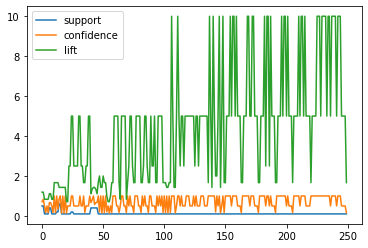

In [ ]:
rules[['support', 'confidence','lift' ]].plot()